In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt

# Get Data 

In [24]:
# Get data
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [25]:
print('Shape of Train images : ',train_images.shape)
print('Shape of Train labels : ', test_labels.shape)

Shape of Train images :  (60000, 28, 28)
Shape of Train labels :  (10000,)


# 10 Images and labels 

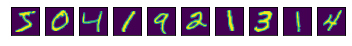


 labels : 
 [5 0 4 1 9 2 1 3 1 4]


In [26]:
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\n labels : \n',train_labels[:10])

# Change data shape (60000 x 28 x 28) to (60000 x 28 x 28 x 1)

In [27]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

# MODEL 1 : 3 Layers with 1 Convolution layer
# MODEL 2 : 5 Layers with 2 Convolution layer
# MODEL 3 : 7 Layers with 4 Convolution layer

In [28]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),
                    keras.layers.MaxPool2D((2,2)),
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])
    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),
                    keras.layers.MaxPool2D((2,2)),
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                    keras.layers.MaxPool2D((2,2)),
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),
                    keras.layers.MaxPool2D((2,2)),
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
                    keras.layers.MaxPool2D((2,2)),
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])
    return model

In [31]:
model = select_model(1)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

# Training 5 epochs

In [34]:
model.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6313 - accuracy: 0.9393
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0882 - accuracy: 0.9741: 
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0715 - accuracy: 0.9783
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0595 - accuracy: 0.9820
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0511 - accuracy: 0.9848


# Test Step

In [35]:
test_loss, accuracy = model.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss : ', test_loss)
print('Test accuracy :', accuracy)

313/313 - 0s - loss: 0.1092 - accuracy: 0.9724

Test loss :  0.1092471033334732
Test accuracy : 0.9724000096321106


# Change test image's to float 32

In [36]:
test_images = tf.cast(test_images, tf.float32)
pred = model.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

In [37]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    plt.xticks(Number)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

In [38]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

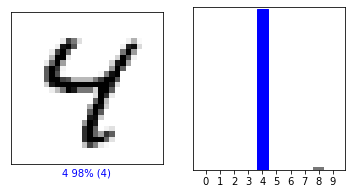

In [50]:
i = 6
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred,  test_labels)
plt.show()

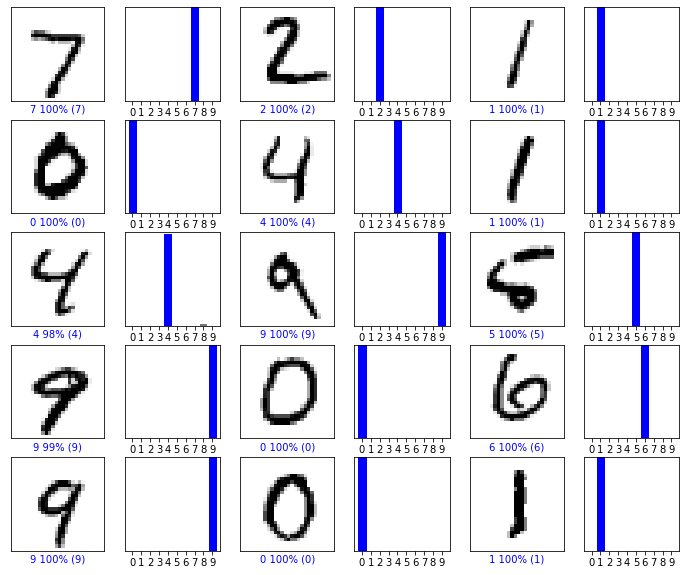

In [46]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, pred, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, pred, test_labels)
plt.show()

In [41]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

In [47]:
index = error_mnist(pred, test_labels)
index_slice = index[:20]
print(index[:20])

[149, 211, 247, 259, 266, 282, 321, 337, 394, 445, 460, 495, 542, 582, 619, 646, 659, 684, 717, 720]


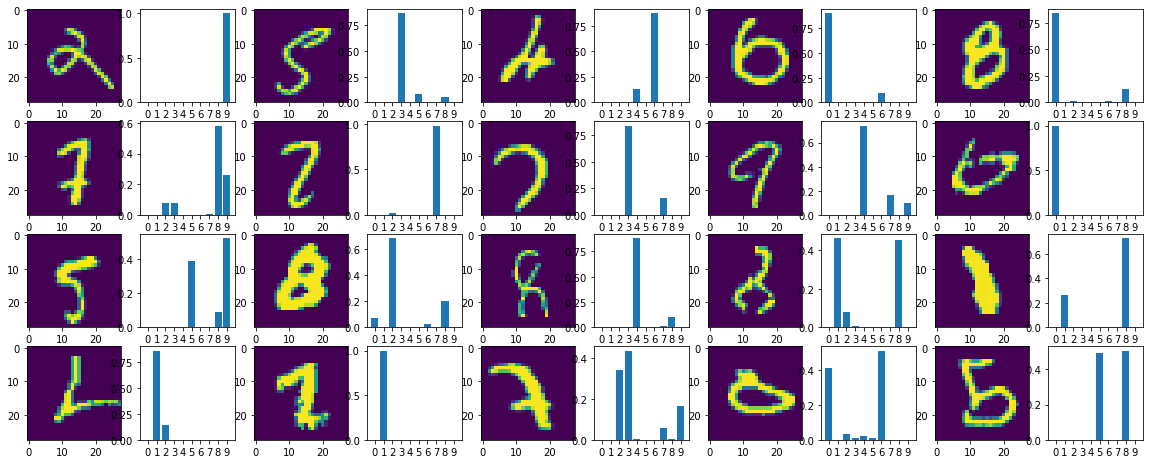

In [48]:
plot_error(index_slice, pred, test_labels)